In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Tensors
---



In [ ]:
# Scalar (0D tensor)
x1 = np.array(3)
print(f'rank : {x1.ndim}')
print(f'dimensions : {x1.shape}')

rank : 0
dimensions : ()


In [ ]:
# Vector (1D tensor)
x2 = np.array([1,2,3,4])
print(f'rank : {x2.ndim}')
print(f'dimensions : {x2.shape}')

rank : 1
dimensions : (4,)


In [ ]:
# Matrix (2D tensor)
x3 = np.array([[1,2,3],
              [4,5,6]])
print(f'rank : {x3.ndim}')
print(f'dimensions : {x3.shape}')

rank : 2
dimensions : (2, 3)


In [ ]:
# 3D tensor
x4 = np.array([[[1,2,3],
                [4,5,6]],
               [[1,2,3],
                [4,5,6]]])
print(f'rank : {x4.ndim}')
print(f'dimensions : {x4.shape}')


rank : 3
dimensions : (2, 2, 3)


In [ ]:
x5 = np.array([4])
print(x5.ndim)
print(x5.shape)

1
(1,)


In [ ]:
# Slicing tenosors
x4[1,0,0]

1

Training a single neuron
---



In [ ]:
# training data
x = np.array([1,2,3,4], dtype=np.float32)
y = np.array([2,4,6,8], dtype=np.float32)

# parameter
w = np.array(0, dtype = np.float32)

# hyper-parameters
epochs = 100
lr = 0.01

# loss values for each parameter's value
l_values = []

# training loop
for i in range(epochs):
  # forward pass / prediction
  y_hat = w * x
  # loss (mse)
  l = ((y - y_hat)**2).mean()
  l_values.append(l)
  # compute gradient
  grad = 2 * (x*(y_hat - y)).mean()
  # update weight
  w -= lr*grad

  if i % 10==0:
    print(f'epoch {i} , mse : {l: .4f}, w : {w}')


epoch 0 , mse :  30.0000, w : 0.30000001192092896
epoch 10 , mse :  1.1628, w : 1.6653136014938354
epoch 20 , mse :  0.0451, w : 1.934108853340149
epoch 30 , mse :  0.0017, w : 1.987027645111084
epoch 40 , mse :  0.0001, w : 1.9974461793899536
epoch 50 , mse :  0.0000, w : 1.9994971752166748
epoch 60 , mse :  0.0000, w : 1.9999010562896729
epoch 70 , mse :  0.0000, w : 1.9999804496765137
epoch 80 , mse :  0.0000, w : 1.999996304512024
epoch 90 , mse :  0.0000, w : 1.9999992847442627


Text(0.5, 0, 'Epoch')

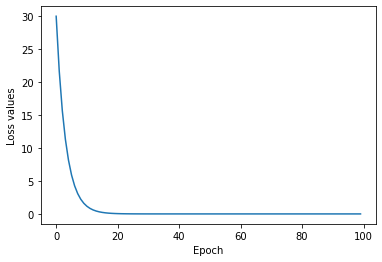

In [ ]:
# loss / epoch
plt.plot(l_values)
plt.ylabel('Loss values')
plt.xlabel('Epoch')

In [ ]:
# test
x_test = 100
y_test = w * x_test
print(f"prediction {y_test: .3f}")

prediction  200.000


Text(0.5, 0, 'Parameter values')

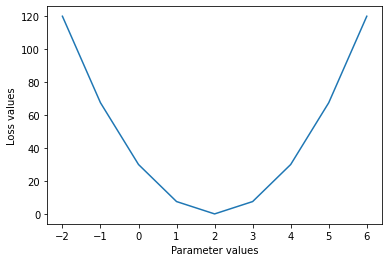

In [ ]:
# ploting the loss function
l_values = []
w = np.arange(-2,6.1)
for i in w:
  l = ((y - (i * x))**2).mean()
  l_values.append(l)

plt.plot(w, l_values)
plt.ylabel('Loss values')
plt.xlabel('Parameter values')

Learning to square
---



Approach 1:

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout

x = np.array([1,2,3,4,5,6,7], dtype = np.float32)
# x = np.random.randint(100, size = 200)

y = np.array([1,4,9,16,25,36,49], dtype = np.float32)
# y = np.array([i*i for i in x])

model = Sequential()
model.add(Dense(20, activation = 'softplus', input_dim = 1))
model.add(Dense(20, activation = 'softplus'))
model.add(Dense(1))

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.1) , metrics=['mae'])
model.fit(x,y,epochs= 1000)


Epoch 1/1000
1/1 [==============================] - 1s 756ms/step - loss: 787.2672 - mae: 22.3590
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 543.5132 - mae: 17.3626
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 332.9036 - mae: 13.6575
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 165.6015 - mae: 11.3457
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 383.9554 - mae: 18.0369
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 213.0795 - mae: 13.0709
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 135.8969 - mae: 10.2787
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 161.5107 - mae: 10.4579
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 190.2765 - mae: 10.8033
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 190.1366 - mae: 10.6567
Epoch 11/1000
1/1 [==============

In [ ]:
model.predict([-5])

1/1 [==============================] - 0s 29ms/step


array([[0.16784206]], dtype=float32)

Approach 2:

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout

x = np.random.randint(-50, 50, size = 200)

y = np.array([i*i for i in x])

model = Sequential()
model.add(Dense(20, activation = 'softplus', input_dim = 1))
model.add(Dense(20, activation = 'softplus'))
model.add(Dense(1))

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01) , metrics=['mae'])
model.fit(x,y,epochs= 1000)


Epoch 1/1000
7/7 [==============================] - 1s 3ms/step - loss: 1274935.5000 - mae: 867.9592
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 1211548.0000 - mae: 841.7606
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 1102855.8750 - mae: 796.0249
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 919558.8125 - mae: 713.1233
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 654103.5625 - mae: 581.8702
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 353318.0000 - mae: 412.0839
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 133414.8125 - mae: 284.5691
Epoch 8/1000
7/7 [==============================] - 0s 3ms/step - loss: 94395.0000 - mae: 276.5459
Epoch 9/1000
7/7 [==============================] - 0s 3ms/step - loss: 108054.7188 - mae: 294.3881
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 87337.3828 - mae: 267.156

In [ ]:
model.predict([10])

In [ ]:
x_test = np.random.randint(-50, 50, size = 200)

In [ ]:
x == x_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


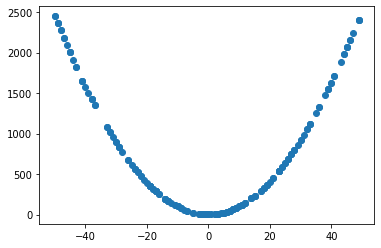

In [ ]:
plt.scatter(x_test, y_pred)